<a href="https://colab.research.google.com/github/rhythmd18/British-Airways-Virtual-Internship/blob/main/BA_internship_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [53]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
      review = para.get_text()
      if review.startswith('✅ Trip Verified |') or review.startswith('Not Verified |'):
        reviews.append(review.split('|', 1)[1].strip())
      else:
        reviews.append(review.strip())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,Easy check in a T5. Galleries south and North ...
1,"Flight delayed by an hour, it happens, no bigg..."
2,The staff are very rude and not trained proper...
3,Good domestic flight operated by BA Cityflyer....
4,Failed at all basic travel fundamentals: 1) Ou...
...,...
3595,I have just been reviewing all the reviews on ...
3596,Flew from San Francisco to Heathrow London. Fl...
3597,I flew Singapore to Sydney with them recently ...
3598,LGW-VRN-LGW both in Club Europe. Was offered a...


## Sentiment Analysis using the BERT transformer model

In [4]:
# Uncomment the line of code below if PyTorch is not installed
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [5]:
!pip install transformers

In [6]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = model.to(device)

In [9]:
def review_rating(review):
  tokens = tokenizer.encode(review, padding=True, truncation=True, add_special_tokens = True, return_tensors='pt').to(device)
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

df['rating'] = df['reviews'].apply(review_rating)
df

,reviews,rating
0,Easy check in a T5. Galleries south and North ...,4
1,"Flight delayed by an hour, it happens, no bigg...",2
2,The staff are very rude and not trained proper...,1
3,Good domestic flight operated by BA Cityflyer....,4
4,Failed at all basic travel fundamentals: 1) Ou...,1
...,...,...
3595,I have just been reviewing all the reviews on ...,1
3596,Flew from San Francisco to Heathrow London. Fl...,1
3597,I flew Singapore to Sydney with them recently ...,1
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2


In [10]:
df['reviews'].iloc[3598]

'LGW-VRN-LGW both in Club Europe. Was offered an upgrade on the way out for £85. Swift check-in as Gatwick was quiet at 6.30am. Used the Galleries lounge-reasonable cold food selection but the only hot option was porridge. Nice atmosphere though and good views of the runway. Left slightly late due to congestion. Nice breakfast with individual bottles of Heidseck Monopole champagne. No aerobridges at Verona so had to walk to a bus in the rain. Bags delivered quickly. Return flight was delayed by an hour as the incoming flight was late. BA use the Catullo lounge which is very poor with an abysmal selection of food-nothing hot not even a sandwich just biscuits and pastries at 9pm! The lounge is before the security check so not able to relax altogether. Crew very apologetic about delay speedy drinks and meal service-the chicken curry was passable.'

In [11]:
df['rating'].value_counts()

rating
1    1232
2     923
4     698
3     459
5     288
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


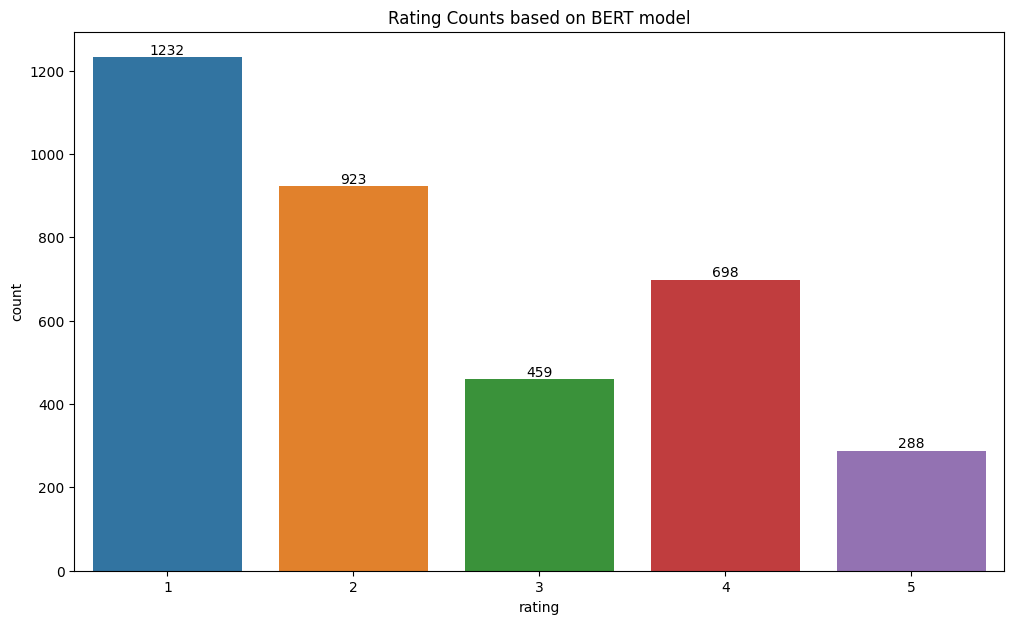

In [39]:
plt.figure(figsize=(12, 7))
plt.title('Rating Counts based on BERT model')
ax = sns.countplot(x='rating', data=df)
ax.bar_label(ax.containers[0])
plt.savefig('rating_count.svg', format='svg', bbox_inches='tight')
plt.show()

In [13]:
rating_counts = df['rating'].value_counts().values
ratings = df['rating'].value_counts().index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


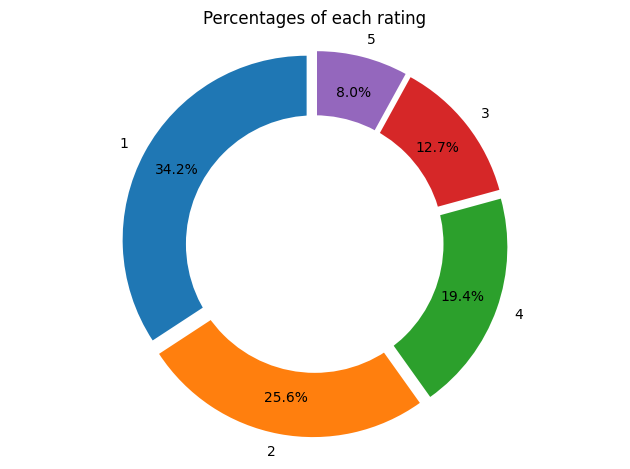

In [40]:
fig1, ax1 = plt.subplots()
plt.title('Percentages of each rating')
ax1.pie(rating_counts, labels=ratings, autopct='%1.1f%%', shadow=False,
        explode=(0.05, 0.05, 0.05, 0.05, 0.05),
        startangle=90, pctdistance=0.80)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.savefig('percentages.svg', format='svg', bbox_inches='tight')
plt.show()

In [15]:
import numpy as np

In [16]:
prod = np.dot(ratings, rating_counts)
avg_rating = prod / np.sum(rating_counts)
print(f'Average Rating: {round(avg_rating, 2)}')

Average Rating: 2.41


## Data Preprocessing
These are the steps we'll perform as part of the data preprocessing
* Removing punctuation
* Tokenization
* Stopwords removal
* Lemmatization

### 1. Removing punctuation marks

In [17]:
import re

def clean(text):
  text = re.sub('[^A-Za-z]+', ' ',str(text))
  return text

df['cleaned_reviews'] = df['reviews'].apply(clean)
df

,reviews,rating,cleaned_reviews
0,Easy check in a T5. Galleries south and North ...,4,Easy check in a T Galleries south and North lo...
1,"Flight delayed by an hour, it happens, no bigg...",2,Flight delayed by an hour it happens no biggie...
2,The staff are very rude and not trained proper...,1,The staff are very rude and not trained proper...
3,Good domestic flight operated by BA Cityflyer....,4,Good domestic flight operated by BA Cityflyer ...
4,Failed at all basic travel fundamentals: 1) Ou...,1,Failed at all basic travel fundamentals Our fl...
...,...,...,...
3595,I have just been reviewing all the reviews on ...,1,I have just been reviewing all the reviews on ...
3596,Flew from San Francisco to Heathrow London. Fl...,1,Flew from San Francisco to Heathrow London Fli...
3597,I flew Singapore to Sydney with them recently ...,1,I flew Singapore to Sydney with them recently ...
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2,LGW VRN LGW both in Club Europe Was offered an...


In [18]:
lowercase_reviews = [review.lower() for review in df['cleaned_reviews']]

df['cleaned_reviews'] = lowercase_reviews
df

,reviews,rating,cleaned_reviews
0,Easy check in a T5. Galleries south and North ...,4,easy check in a t galleries south and north lo...
1,"Flight delayed by an hour, it happens, no bigg...",2,flight delayed by an hour it happens no biggie...
2,The staff are very rude and not trained proper...,1,the staff are very rude and not trained proper...
3,Good domestic flight operated by BA Cityflyer....,4,good domestic flight operated by ba cityflyer ...
4,Failed at all basic travel fundamentals: 1) Ou...,1,failed at all basic travel fundamentals our fl...
...,...,...,...
3595,I have just been reviewing all the reviews on ...,1,i have just been reviewing all the reviews on ...
3596,Flew from San Francisco to Heathrow London. Fl...,1,flew from san francisco to heathrow london fli...
3597,I flew Singapore to Sydney with them recently ...,1,i flew singapore to sydney with them recently ...
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2,lgw vrn lgw both in club europe was offered an...


### 2. Tokenization

In [19]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_review(review):
  tokens = word_tokenize(review)
  return tokens

df['tokenized_reviews'] = df['cleaned_reviews'].apply(tokenize_review)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviews,rating,cleaned_reviews,tokenized_reviews
0,Easy check in a T5. Galleries south and North ...,4,easy check in a t galleries south and north lo...,"[easy, check, in, a, t, galleries, south, and,..."
1,"Flight delayed by an hour, it happens, no bigg...",2,flight delayed by an hour it happens no biggie...,"[flight, delayed, by, an, hour, it, happens, n..."
2,The staff are very rude and not trained proper...,1,the staff are very rude and not trained proper...,"[the, staff, are, very, rude, and, not, traine..."
3,Good domestic flight operated by BA Cityflyer....,4,good domestic flight operated by ba cityflyer ...,"[good, domestic, flight, operated, by, ba, cit..."
4,Failed at all basic travel fundamentals: 1) Ou...,1,failed at all basic travel fundamentals our fl...,"[failed, at, all, basic, travel, fundamentals,..."
...,...,...,...,...
3595,I have just been reviewing all the reviews on ...,1,i have just been reviewing all the reviews on ...,"[i, have, just, been, reviewing, all, the, rev..."
3596,Flew from San Francisco to Heathrow London. Fl...,1,flew from san francisco to heathrow london fli...,"[flew, from, san, francisco, to, heathrow, lon..."
3597,I flew Singapore to Sydney with them recently ...,1,i flew singapore to sydney with them recently ...,"[i, flew, singapore, to, sydney, with, them, r..."
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2,lgw vrn lgw both in club europe was offered an...,"[lgw, vrn, lgw, both, in, club, europe, was, o..."


### 3. Stopword removal

In [20]:
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  filtered_tokens = []
  for token in tokens:
    if token not in stop_words and len(token) > 3:
      filtered_tokens.append(token)
  return filtered_tokens

df['filtered_reviews'] = df['tokenized_reviews'].apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,rating,cleaned_reviews,tokenized_reviews,filtered_reviews
0,Easy check in a T5. Galleries south and North ...,4,easy check in a t galleries south and north lo...,"[easy, check, in, a, t, galleries, south, and,...","[easy, check, galleries, south, north, lounges..."
1,"Flight delayed by an hour, it happens, no bigg...",2,flight delayed by an hour it happens no biggie...,"[flight, delayed, by, an, hour, it, happens, n...","[flight, delayed, hour, happens, biggie, chang..."
2,The staff are very rude and not trained proper...,1,the staff are very rude and not trained proper...,"[the, staff, are, very, rude, and, not, traine...","[staff, rude, trained, properly, exceptions, m..."
3,Good domestic flight operated by BA Cityflyer....,4,good domestic flight operated by ba cityflyer ...,"[good, domestic, flight, operated, by, ba, cit...","[good, domestic, flight, operated, cityflyer, ..."
4,Failed at all basic travel fundamentals: 1) Ou...,1,failed at all basic travel fundamentals our fl...,"[failed, at, all, basic, travel, fundamentals,...","[failed, basic, travel, fundamentals, flight, ..."
...,...,...,...,...,...
3595,I have just been reviewing all the reviews on ...,1,i have just been reviewing all the reviews on ...,"[i, have, just, been, reviewing, all, the, rev...","[reviewing, reviews, website, seems, every, ev..."
3596,Flew from San Francisco to Heathrow London. Fl...,1,flew from san francisco to heathrow london fli...,"[flew, from, san, francisco, to, heathrow, lon...","[flew, francisco, heathrow, london, flight, de..."
3597,I flew Singapore to Sydney with them recently ...,1,i flew singapore to sydney with them recently ...,"[i, flew, singapore, to, sydney, with, them, r...","[flew, singapore, sydney, recently, horrible, ..."
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2,lgw vrn lgw both in club europe was offered an...,"[lgw, vrn, lgw, both, in, club, europe, was, o...","[club, europe, offered, upgrade, swift, check,..."


### 4. Lemmatization

In [21]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def pos_tagging(tokens):
  tags = pos_tag(tokens)
  tagged_list = [tuple([word, pos_dict.get(tag[0])]) for word, tag in tags]

  return tagged_list

df['pos_tagged'] = df['filtered_reviews'].apply(pos_tagging)

lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
  lemma_rev = []
  for word, pos in pos_data:
    if not pos:
      lemma = word
      lemma_rev.append(lemma)
    elif pos=='n':
      lemma = lemmatizer.lemmatize(word, pos=pos)
      lemma_rev.append(lemma)
  return lemma_rev

df['lemmatized'] = df['pos_tagged'].apply(lemmatize)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,rating,cleaned_reviews,tokenized_reviews,filtered_reviews,pos_tagged,lemmatized
0,Easy check in a T5. Galleries south and North ...,4,easy check in a t galleries south and north lo...,"[easy, check, in, a, t, galleries, south, and,...","[easy, check, galleries, south, north, lounges...","[(easy, a), (check, n), (galleries, n), (south...","[check, gallery, lounge, seat, lounge, quieter..."
1,"Flight delayed by an hour, it happens, no bigg...",2,flight delayed by an hour it happens no biggie...,"[flight, delayed, by, an, hour, it, happens, n...","[flight, delayed, hour, happens, biggie, chang...","[(flight, n), (delayed, v), (hour, n), (happen...","[flight, hour, happens, change, gate, airport,..."
2,The staff are very rude and not trained proper...,1,the staff are very rude and not trained proper...,"[the, staff, are, very, rude, and, not, traine...","[staff, rude, trained, properly, exceptions, m...","[(staff, n), (rude, n), (trained, v), (properl...","[staff, rude, exception, child, people, price,..."
3,Good domestic flight operated by BA Cityflyer....,4,good domestic flight operated by ba cityflyer ...,"[good, domestic, flight, operated, by, ba, cit...","[good, domestic, flight, operated, cityflyer, ...","[(good, a), (domestic, a), (flight, n), (opera...","[flight, cityflyer, ground, service, check, ai..."
4,Failed at all basic travel fundamentals: 1) Ou...,1,failed at all basic travel fundamentals our fl...,"[failed, at, all, basic, travel, fundamentals,...","[failed, basic, travel, fundamentals, flight, ...","[(failed, v), (basic, a), (travel, n), (fundam...","[travel, fundamental, flight, staff, check, ca..."
...,...,...,...,...,...,...,...
3595,I have just been reviewing all the reviews on ...,1,i have just been reviewing all the reviews on ...,"[i, have, just, been, reviewing, all, the, rev...","[reviewing, reviews, website, seems, every, ev...","[(reviewing, v), (reviews, n), (website, r), (...","[review, every, evident, class, flight, econom..."
3596,Flew from San Francisco to Heathrow London. Fl...,1,flew from san francisco to heathrow london fli...,"[flew, from, san, francisco, to, heathrow, lon...","[flew, francisco, heathrow, london, flight, de...","[(flew, a), (francisco, n), (heathrow, n), (lo...","[francisco, heathrow, flight, hour, food, airl..."
3597,I flew Singapore to Sydney with them recently ...,1,i flew singapore to sydney with them recently ...,"[i, flew, singapore, to, sydney, with, them, r...","[flew, singapore, sydney, recently, horrible, ...","[(flew, n), (singapore, v), (sydney, n), (rece...","[flew, sydney, experience, staff, passenger, b..."
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2,lgw vrn lgw both in club europe was offered an...,"[lgw, vrn, lgw, both, in, club, europe, was, o...","[club, europe, offered, upgrade, swift, check,...","[(club, n), (europe, n), (offered, v), (upgrad...","[club, europe, swift, check, gatwick, quiet, g..."


In [22]:
def remove_words(tokens):
  words_to_remove = ['flight', 'british', 'airway', 'make', 'although', 'find', 'give', 'plane', 'time']
  words = [word for word in tokens if word not in words_to_remove]
  return words

df['preprocessed'] = df['lemmatized'].apply(lambda x: remove_words(x))
df

,reviews,rating,cleaned_reviews,tokenized_reviews,filtered_reviews,pos_tagged,lemmatized,preprocessed
0,Easy check in a T5. Galleries south and North ...,4,easy check in a t galleries south and north lo...,"[easy, check, in, a, t, galleries, south, and,...","[easy, check, galleries, south, north, lounges...","[(easy, a), (check, n), (galleries, n), (south...","[check, gallery, lounge, seat, lounge, quieter...","[check, gallery, lounge, seat, lounge, quieter..."
1,"Flight delayed by an hour, it happens, no bigg...",2,flight delayed by an hour it happens no biggie...,"[flight, delayed, by, an, hour, it, happens, n...","[flight, delayed, hour, happens, biggie, chang...","[(flight, n), (delayed, v), (hour, n), (happen...","[flight, hour, happens, change, gate, airport,...","[hour, happens, change, gate, airport, gate, a..."
2,The staff are very rude and not trained proper...,1,the staff are very rude and not trained proper...,"[the, staff, are, very, rude, and, not, traine...","[staff, rude, trained, properly, exceptions, m...","[(staff, n), (rude, n), (trained, v), (properl...","[staff, rude, exception, child, people, price,...","[staff, rude, exception, child, people, price,..."
3,Good domestic flight operated by BA Cityflyer....,4,good domestic flight operated by ba cityflyer ...,"[good, domestic, flight, operated, by, ba, cit...","[good, domestic, flight, operated, cityflyer, ...","[(good, a), (domestic, a), (flight, n), (opera...","[flight, cityflyer, ground, service, check, ai...","[cityflyer, ground, service, check, airport, d..."
4,Failed at all basic travel fundamentals: 1) Ou...,1,failed at all basic travel fundamentals our fl...,"[failed, at, all, basic, travel, fundamentals,...","[failed, basic, travel, fundamentals, flight, ...","[(failed, v), (basic, a), (travel, n), (fundam...","[travel, fundamental, flight, staff, check, ca...","[travel, fundamental, staff, check, carry, tho..."
...,...,...,...,...,...,...,...,...
3595,I have just been reviewing all the reviews on ...,1,i have just been reviewing all the reviews on ...,"[i, have, just, been, reviewing, all, the, rev...","[reviewing, reviews, website, seems, every, ev...","[(reviewing, v), (reviews, n), (website, r), (...","[review, every, evident, class, flight, econom...","[review, every, evident, class, economy, take,..."
3596,Flew from San Francisco to Heathrow London. Fl...,1,flew from san francisco to heathrow london fli...,"[flew, from, san, francisco, to, heathrow, lon...","[flew, francisco, heathrow, london, flight, de...","[(flew, a), (francisco, n), (heathrow, n), (lo...","[francisco, heathrow, flight, hour, food, airl...","[francisco, heathrow, hour, food, airline, set..."
3597,I flew Singapore to Sydney with them recently ...,1,i flew singapore to sydney with them recently ...,"[i, flew, singapore, to, sydney, with, them, r...","[flew, singapore, sydney, recently, horrible, ...","[(flew, n), (singapore, v), (sydney, n), (rece...","[flew, sydney, experience, staff, passenger, b...","[flew, sydney, experience, staff, passenger, b..."
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,2,lgw vrn lgw both in club europe was offered an...,"[lgw, vrn, lgw, both, in, club, europe, was, o...","[club, europe, offered, upgrade, swift, check,...","[(club, n), (europe, n), (offered, v), (upgrad...","[club, europe, swift, check, gatwick, quiet, g...","[club, europe, swift, check, gatwick, quiet, g..."


## Word Cloud

In [23]:
string = ' '.join([' '.join(review) for review in df['preprocessed']])
string

'check gallery lounge seat lounge quieter deck club world like toilet cabin family tech issue entertainment system though without success food drink option entertainment hour happens change gate airport gate agent check bag would gate agent seat squeeze travel staff rude exception child people price ticket distance service cityflyer ground service check airport drink snack albeit cityflyer subsidiary mainline travel fundamental staff check carry though allowance fact connection staff baggage situation three week care communication whatsoever connection checkpoint heathrow trip agent hand luggage since claim arrival airport three week communication status conclusion male effort care hour hour staff member board announcement delay board captain staff boarding departure slot blame someone inability incapacity hire personnel staff demand today seat zone style thing menu breakfast food arrival night dinner inflight entertainment collection film rate hour could without reserve class london p

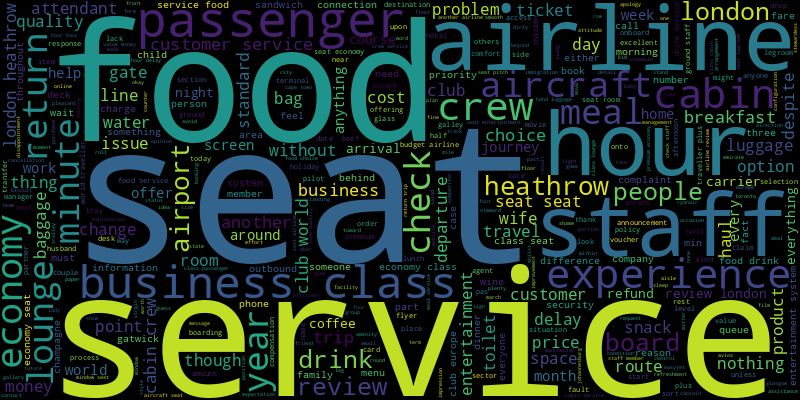

In [24]:
from wordcloud import WordCloud

# string = ','.join(list(df['cleaned_reviews'].values))

wordcloud = WordCloud(background_color='black', max_words=5000, contour_width=10, width=800, height=400)

wordcloud.generate(string)

wordcloud.to_image()

In [25]:
df = df[['reviews', 'preprocessed', 'rating']]
df

,reviews,preprocessed,rating
0,Easy check in a T5. Galleries south and North ...,"[check, gallery, lounge, seat, lounge, quieter...",4
1,"Flight delayed by an hour, it happens, no bigg...","[hour, happens, change, gate, airport, gate, a...",2
2,The staff are very rude and not trained proper...,"[staff, rude, exception, child, people, price,...",1
3,Good domestic flight operated by BA Cityflyer....,"[cityflyer, ground, service, check, airport, d...",4
4,Failed at all basic travel fundamentals: 1) Ou...,"[travel, fundamental, staff, check, carry, tho...",1
...,...,...,...
3595,I have just been reviewing all the reviews on ...,"[review, every, evident, class, economy, take,...",1
3596,Flew from San Francisco to Heathrow London. Fl...,"[francisco, heathrow, hour, food, airline, set...",1
3597,I flew Singapore to Sydney with them recently ...,"[flew, sydney, experience, staff, passenger, b...",1
3598,LGW-VRN-LGW both in Club Europe. Was offered a...,"[club, europe, swift, check, gatwick, quiet, g...",2


In [26]:
# df.to_csv('/content/BA_reviews.csv')

## Topic Modelling
Since most of the reviews, as it turns out, are critical(<b><u>34.2%</u></b>), we will collect all of the negative reviews, perform topic modelling on them and try extracting some aspects the customers are having issues with. This will likely help the airline figure out issues and address them ASAP.

In [27]:
df1 = df[df['rating']==1]
rating1_reviews = df1['preprocessed']

In [28]:
rating1_reviews[:10]

2     [staff, rude, exception, child, people, price,...
4     [travel, fundamental, staff, check, carry, tho...
5     [baggage, situation, three, week, care, commun...
6     [hour, hour, staff, member, board, announcemen...
7     [blame, someone, inability, incapacity, hire, ...
9     [book, online, check, staff, staff, toulouse, ...
12    [experience, travel, gibraltar, heathrow, afte...
13    [airline, life, glory, crisis, family, busines...
15    [everything, work, hour, problem, minute, numb...
16    [economy, return, journey, journey, return, jo...
Name: preprocessed, dtype: object

In [29]:
import gensim
from gensim import corpora, models

# Create a dictionary from the worst reviews `rating1_reviews` which will contain the number of times a word appears in the data
dictionary = gensim.corpora.Dictionary(rating1_reviews)

count = 0
for k, v in dictionary.iteritems():
  print(k, v)
  count += 1
  if count > 10:
    break


0 child
1 distance
2 exception
3 people
4 price
5 rude
6 service
7 staff
8 ticket
9 allowance
10 carry


In [30]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [31]:
bow_corpus = [dictionary.doc2bow(doc) for doc in rating1_reviews]
bow_corpus[100]

[(6, 1),
 (17, 2),
 (19, 1),
 (26, 2),
 (31, 1),
 (39, 1),
 (41, 1),
 (49, 1),
 (51, 1),
 (56, 2),
 (67, 1),
 (87, 1),
 (107, 1),
 (122, 1),
 (126, 2),
 (127, 1),
 (149, 1),
 (151, 1),
 (229, 2),
 (255, 1),
 (499, 2),
 (573, 1),
 (592, 1),
 (593, 1),
 (594, 1),
 (595, 1)]

In [32]:
bow_doc_100 = bow_corpus[100]
for i in range(len(bow_doc_100)):
  print(f'Word {bow_doc_100[i][0]}(\'{dictionary[bow_doc_100[i][0]]}\') appears {bow_doc_100[i][1]} {"time" if bow_doc_100[i][1] == 1 else "times"}')

Word 6('service') appears 1 time
Word 17('airport') appears 2 times
Word 19('baggage') appears 1 time
Word 26('luggage') appears 2 times
Word 31('three') appears 1 time
Word 39('delay') appears 1 time
Word 41('hour') appears 1 time
Word 49('online') appears 1 time
Word 51('afternoon') appears 1 time
Word 56('bag') appears 2 times
Word 67('customer') appears 1 time
Word 87('night') appears 1 time
Word 107('within') appears 1 time
Word 122('information') appears 1 time
Word 126('number') appears 2 times
Word 127('phone') appears 1 time
Word 149('day') appears 1 time
Word 151('email') appears 1 time
Word 229('message') appears 2 times
Word 255('onto') appears 1 time
Word 499('form') appears 2 times
Word 573('tag') appears 1 time
Word 592('code') appears 1 time
Word 593('evening') appears 1 time
Word 594('phoenix') appears 1 time
Word 595('sunday') appears 1 time


In [33]:
#apply the gensim LDA model and generate 10 topics from the corpus
lda_model = gensim.models.LdaMulticore(
    corpus=bow_corpus,
    num_topics=10,
    id2word=dictionary,
    passes=10,
    workers=2,
)

In [34]:
for idx, topic in lda_model.print_topics(-1):
  print(f'Topic: {idx} \nWords: {topic}')
  print('\n')

Topic: 0 
Words: 0.042*"service" + 0.040*"hour" + 0.035*"customer" + 0.023*"heathrow" + 0.017*"could" + 0.017*"would" + 0.016*"airport" + 0.016*"london" + 0.015*"another" + 0.015*"airline"


Topic: 1 
Words: 0.064*"class" + 0.045*"business" + 0.034*"staff" + 0.032*"service" + 0.028*"food" + 0.022*"lounge" + 0.021*"economy" + 0.020*"passenger" + 0.015*"check" + 0.014*"minute"


Topic: 2 
Words: 0.096*"seat" + 0.030*"food" + 0.021*"economy" + 0.021*"service" + 0.020*"airline" + 0.018*"cabin" + 0.014*"hour" + 0.014*"business" + 0.014*"passenger" + 0.012*"class"


Topic: 3 
Words: 0.025*"passenger" + 0.024*"staff" + 0.023*"would" + 0.022*"seat" + 0.019*"hour" + 0.016*"airline" + 0.015*"service" + 0.013*"review" + 0.012*"food" + 0.011*"heathrow"


Topic: 4 
Words: 0.039*"customer" + 0.039*"service" + 0.029*"ticket" + 0.027*"seat" + 0.024*"refund" + 0.024*"would" + 0.018*"airline" + 0.016*"could" + 0.015*"business" + 0.015*"class"


Topic: 5 
Words: 0.042*"meal" + 0.041*"airline" + 0.032*"ho

In [38]:
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.140825 -0.010367       1        1  16.010349
4      0.064258 -0.113019       2        1  13.774648
3     -0.002744  0.040237       3        1  13.746879
0      0.109795  0.001477       4        1   9.947836
1     -0.098375  0.093915       5        1   9.637581
5     -0.107140  0.051982       6        1   8.258340
8      0.128665 -0.001742       7        1   8.070551
7     -0.122797 -0.055817       8        1   7.532802
9      0.157403  0.096174       9        1   7.464593
6      0.011760 -0.102841      10        1   5.556422, topic_info=         Term         Freq        Total Category  logprob  loglift
113     class   581.000000   581.000000  Default  30.0000  30.0000
50       seat  1136.000000  1136.000000  Default  29.0000  29.0000
112  business   506.000000   506.000000  Default  28.0000  28.0000
41       hour   885.000000   885.000000  Default  27.0000  27.0000
83       meal   230.000000   230.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
7       staff    18.419893   553.380448  Topic10  -4.7542  -0.5124
88    nothing    14.883037   183.879409  Topic10  -4.9674   0.3762
120      food    16.672083   575.759473  Topic10  -4.8539  -0.6517
127     phone    13.721214   163.802403  Topic10  -5.0487   0.4105
113     class    14.736396   581.895020  Topic10  -4.9773  -0.7858

[684 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
396       1  0.311785  absolute
396       5  0.467678  absolute
396       7  0.077946  absolute
524       5  0.103844    accept
524       6  0.207687    accept
...     ...       ...       ...
111       6  0.168688      year
111       7  0.049372      year
111       8  0.032915      year
111       9  0.012343      year
111      10  0.069944      year

[2105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2, 6, 9, 8, 10, 7])

## Insights gained:
We took the most critical reviews to analyze what customers were critising the most about. These are some of the facets customers possibly had issues with:
* <b>Poor customer Service at Heathrow Airport</b>
* <b>Poor service at business class.</b>
* <b>Uncomfortable seats and Economy class issues</b>
* <b>Staff behaviour</b>
* <b>Ticket related issues especially regarding refunds</b>
* <b>Issues regarding food offered during in-flight meals</b>
* <b>Issues regarding the airlines and the trip itself</b>
* <b>Luggage and baggage issues</b>
* <b>Check-in and airport experience</b>

In summary, the worst flight reviews with ratings of 1 out of 5 seem to be driven by a combination of factors such as poor customer service, uncomfortable seats, issues with business class services, dissatisfaction with meals, problems with ticketing and refunds, baggage-related concerns, and negative interactions with staff and the airport environment. These topics provide valuable insights into the specific pain points that led to the low ratings in these reviews.